# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 27.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 76.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 25.5MB/s]


In [4]:
data = pd.read_csv('./train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Для начала выведем 10 случайных строк:

In [6]:
data.sample(n = 10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3323,26,49.15,1237.3,Male,0,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),0
5056,56,85.65,4824.45,Male,1,Yes,No,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
3607,31,99.95,3186.65,Female,1,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
973,45,62.55,2796.45,Female,0,No,No,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),0
193,53,64.15,3491.55,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),0
2560,4,19.85,63,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,0
2405,68,25.80,1911.5,Female,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2914,60,104.95,6236.75,Female,0,No,No,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),0
2740,69,108.75,7493.05,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),0
5220,65,72.45,4653.85,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,No,No,Yes,One year,No,Credit card (automatic),1


Выводы: видим, что по казалось бы бинарные категории на самом деле бывают мультиклассовыми. К примеру, у HasMultiplePhoneNumbers есть ответы yes/no/No phone service. Посмотрим подробнее на числовые переменные:

In [7]:
data[num_cols].describe()

,ClientPeriod,MonthlySpending
count,5282.000000,5282.000000
mean,32.397009,64.924754
std,24.550326,30.176464
min,0.000000,18.250000
25%,9.000000,35.462500
50%,29.000000,70.400000
75%,55.000000,90.050000
max,72.000000,118.750000


Выводы:  

*   видим, что распределение числовых переменных не очень близко к нормальному - среднее далеко от $(max-min)/2$
*   колонка с TotalSpent не обработалась автоматически в нужном формате, преобразуем дополнительно:

In [8]:
data[data['TotalSpent'] == ' '] # видим, что иногда вместо тотал спент просто стоит пробел. таких строк мало, думаю, можем просто заполнить нулем

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [9]:
data.loc[data['TotalSpent'] == ' ', 'TotalSpent'] = 0
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

In [10]:
data['TotalSpent'].describe()

,TotalSpent
count,5282.000000
mean,2287.486161
std,2269.049195
min,0.000000
25%,395.725000
50%,1405.650000
75%,3795.212500
max,8684.800000


Посмотрим на то, есть ли еще строки, в которых стоят пробелы вместо пропущенных значений:

In [11]:
def contains_space(row):
    return any(cell == ' ' for cell in row)

rows_with_spaces = data[data.apply(contains_space, axis=1)]

print(rows_with_spaces)

Empty DataFrame
Columns: [ClientPeriod, MonthlySpending, TotalSpent, Sex, IsSeniorCitizen, HasPartner, HasChild, HasPhoneService, HasMultiplePhoneNumbers, HasInternetService, HasOnlineSecurityService, HasOnlineBackup, HasDeviceProtection, HasTechSupportAccess, HasOnlineTV, HasMovieSubscription, HasContractPhone, IsBillingPaperless, PaymentMethod, Churn]
Index: []


К счастью, таких строк нет. Проверим на пропуски:

In [12]:
data.isna().sum()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


Вывод: пропусков на трейне нет, а это счастье. **Но момент с пробелами вместо значений надо запомнить для теста**

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Построим графики:

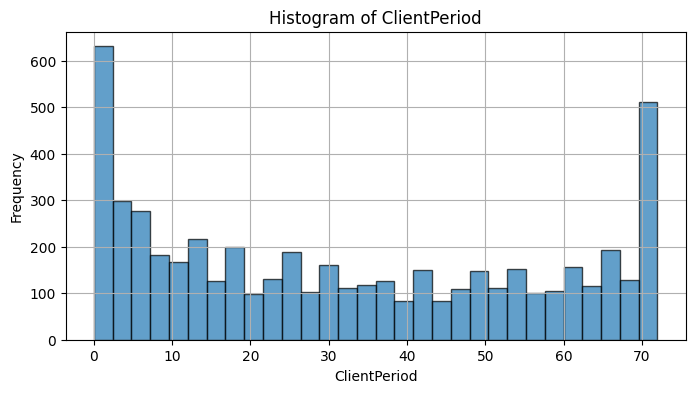

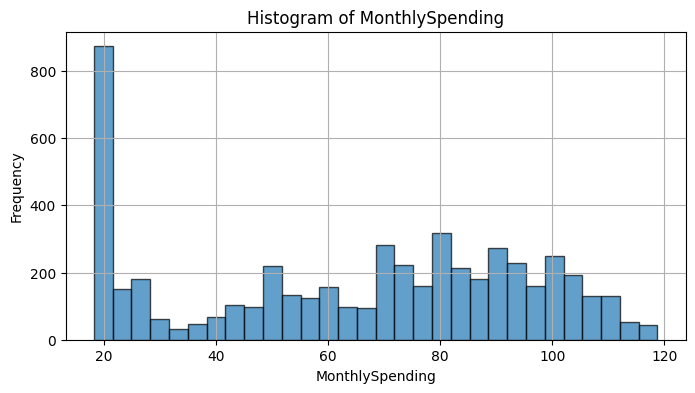

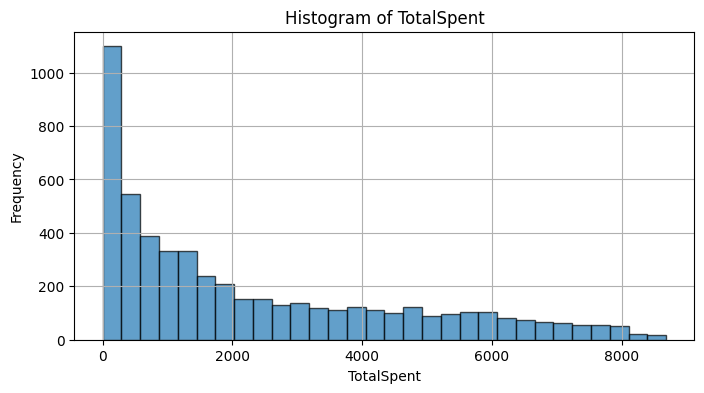

In [13]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(data[col].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

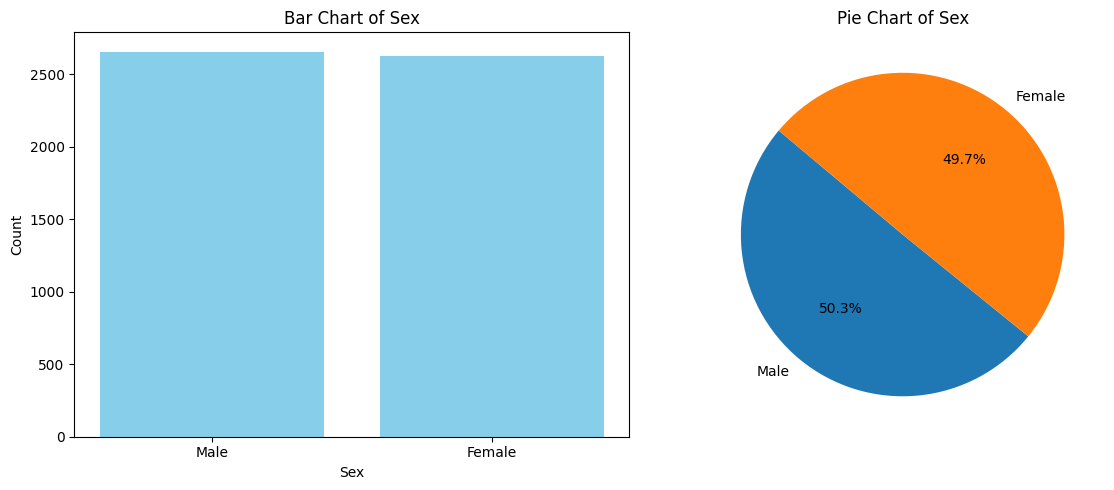

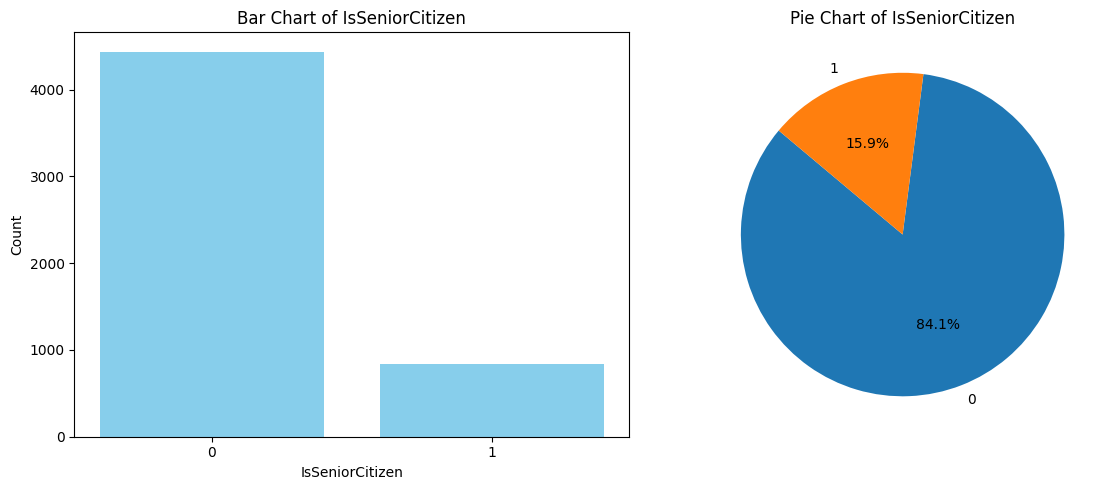

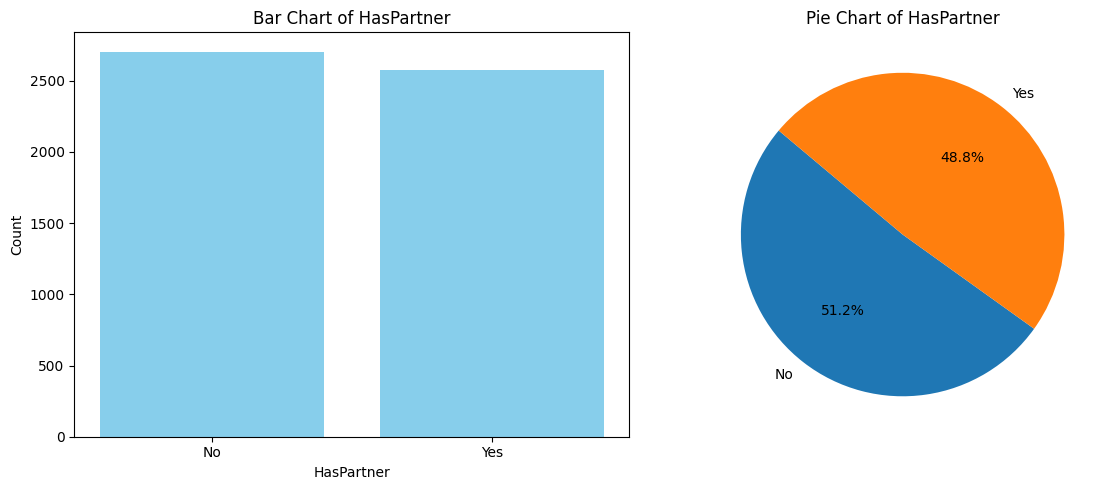

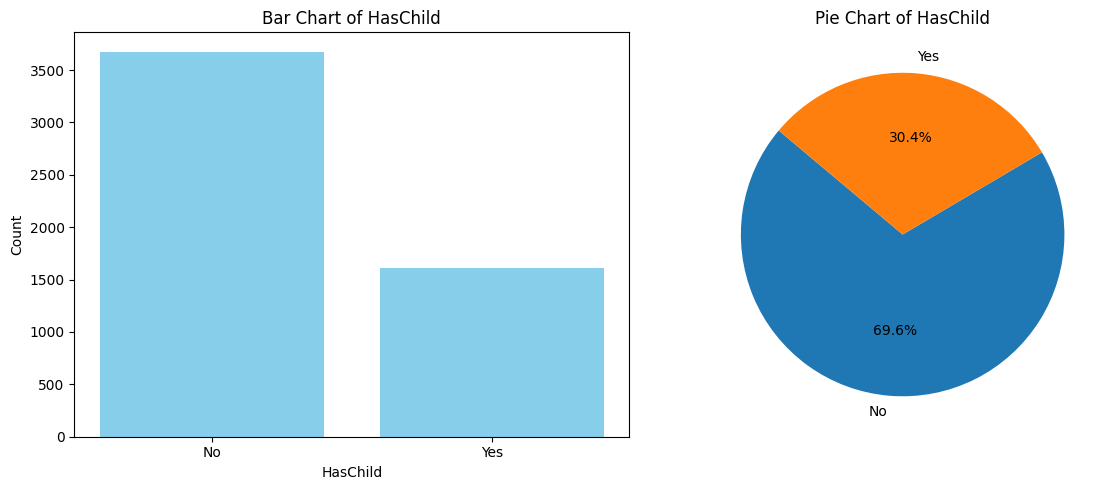

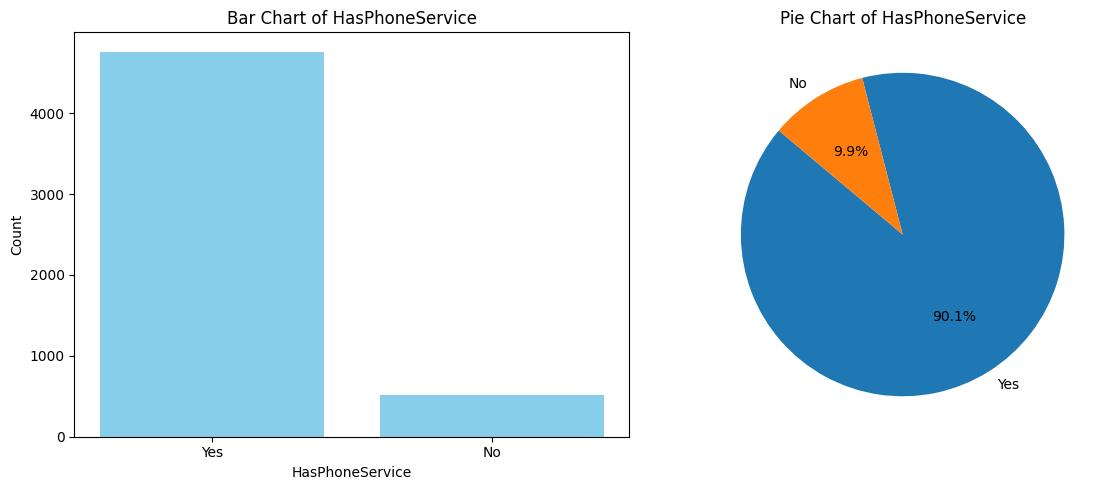

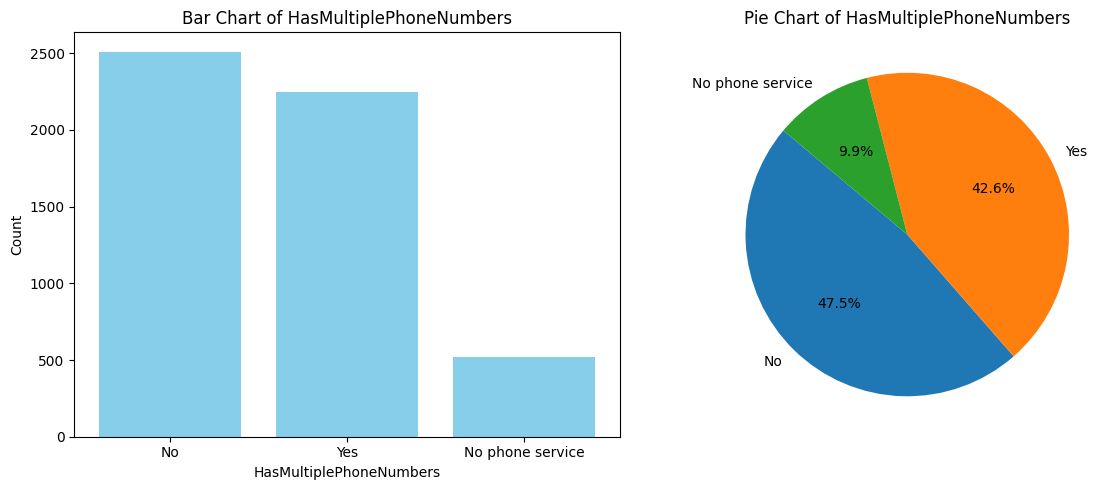

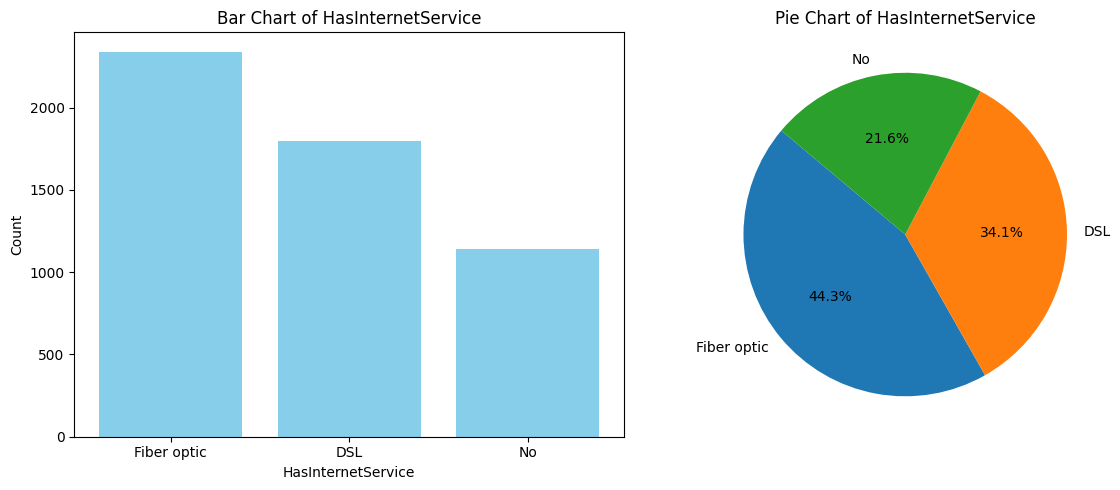

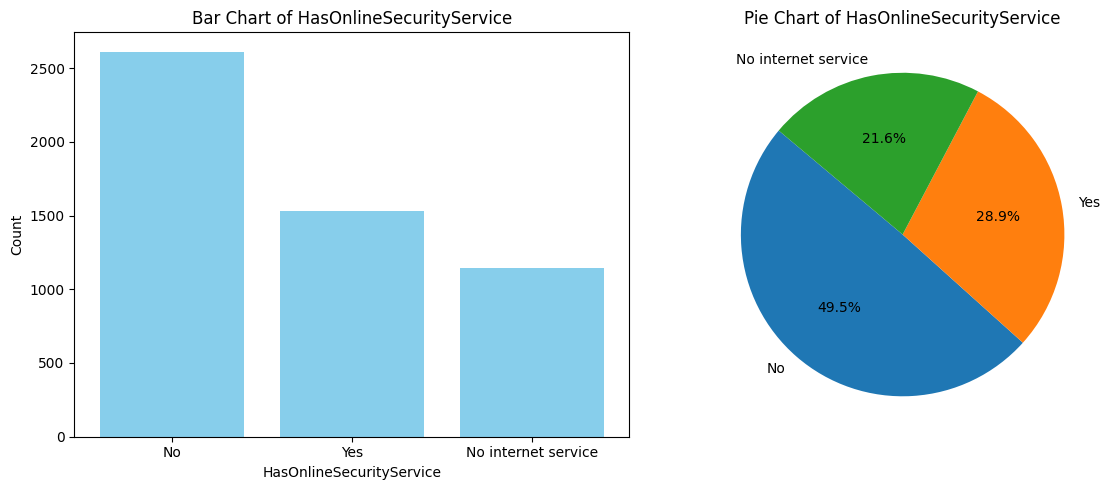

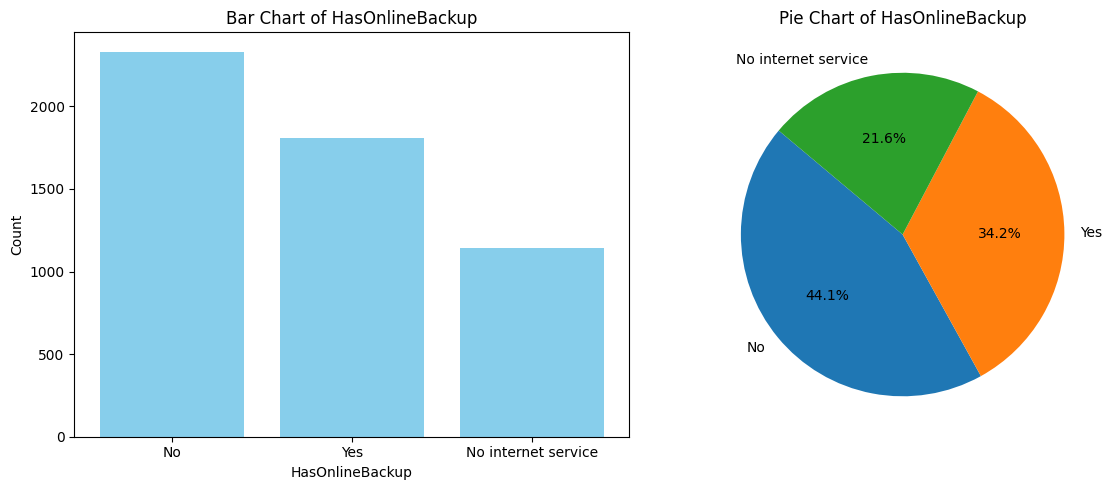

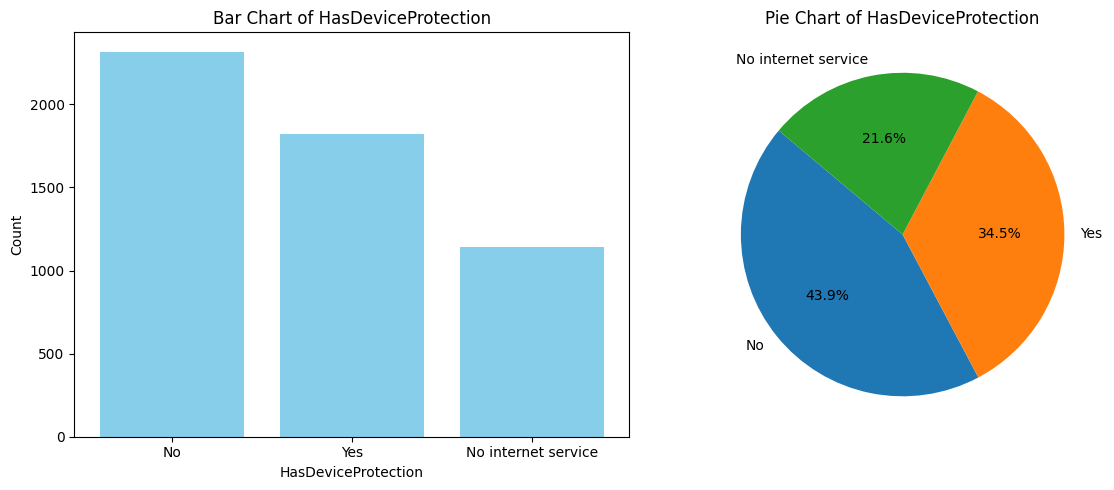

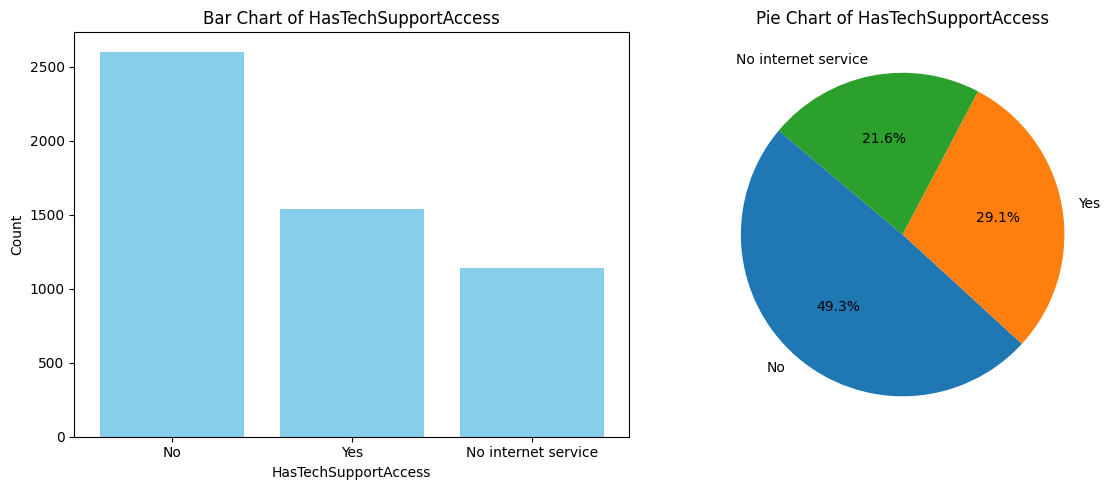

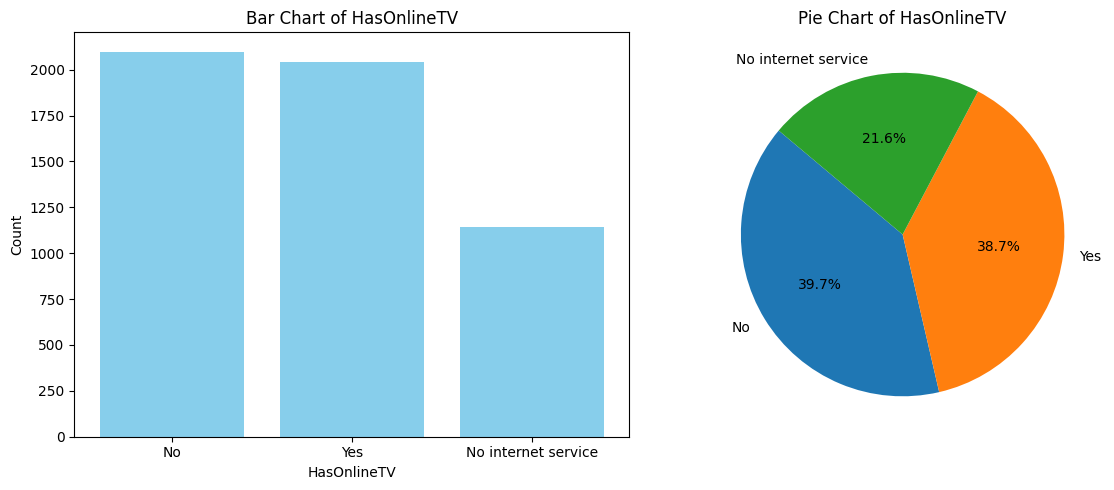

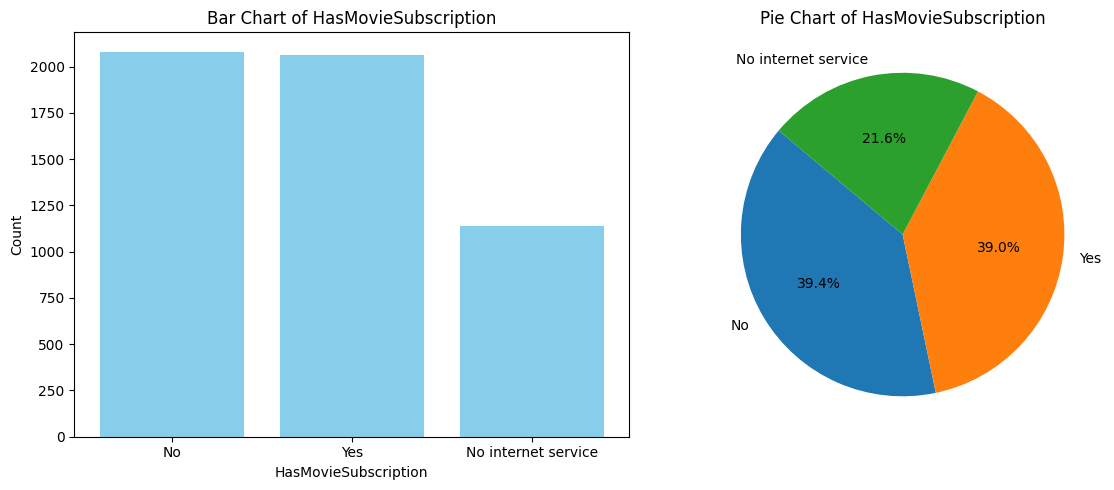

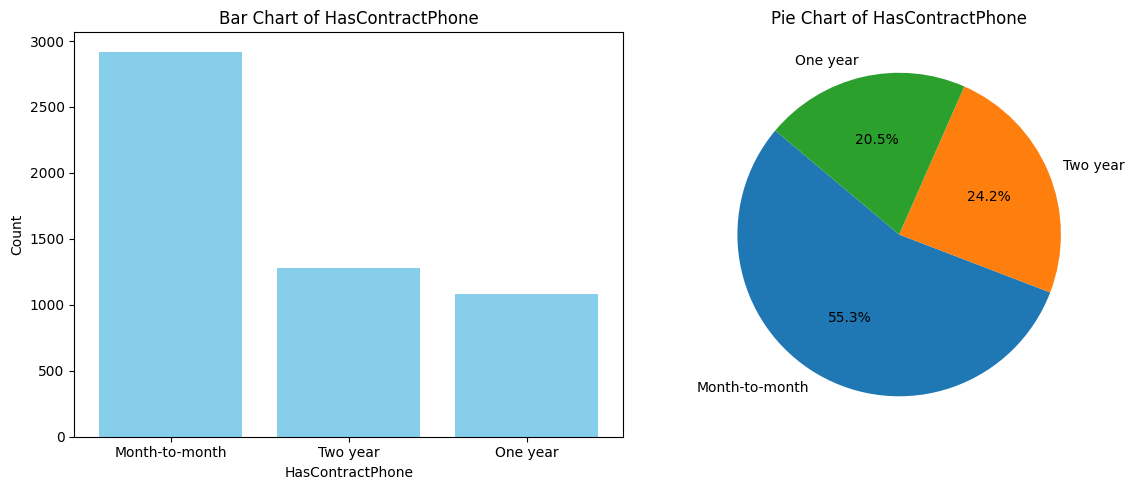

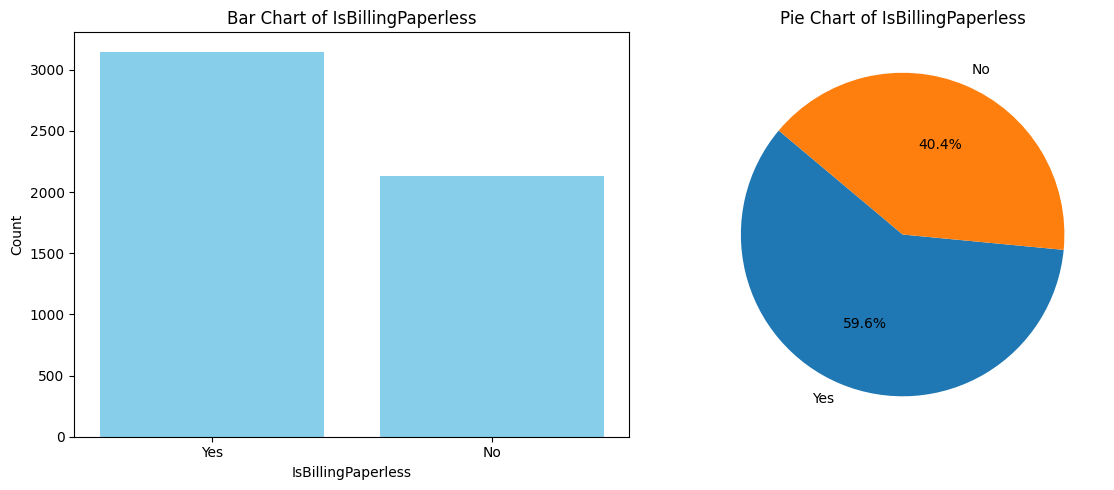

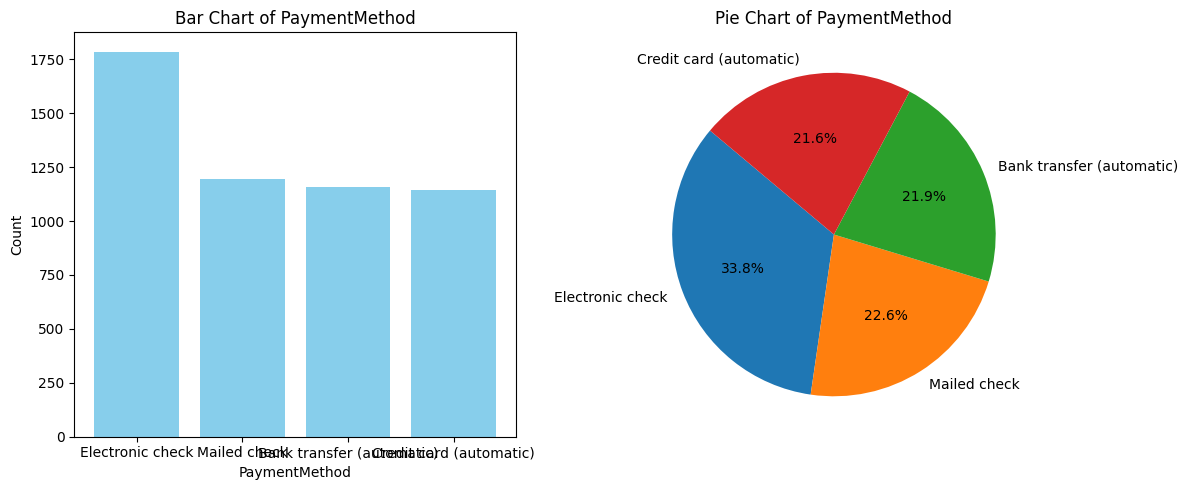

In [14]:
for col in cat_cols:
    value_counts = data[col].value_counts()

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Bar chart
    ax[0].bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
    ax[0].set_title(f'Bar Chart of {col}')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Count')

    # Pie chart
    ax[1].pie(value_counts.values, labels=value_counts.index.astype(str), autopct='%1.1f%%', startangle=140)
    ax[1].set_title(f'Pie Chart of {col}')

    plt.tight_layout()
    plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

**Мы видим, что распределение числовых признаков далеко от нормального. Попробуем ввести дополнительные преобразования - возьмем логарифмы от ClientPeriod и TotalSpent**

In [15]:
import numpy as np
data['ClientPeriod_log'] = np.log(data['ClientPeriod'] + 1)
data['TotalSpent_log'] = np.log(data['TotalSpent'] + 1)
num_cols.append('ClientPeriod_log')
num_cols.append('TotalSpent_log')
feature_cols = num_cols + cat_cols


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [16]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [17]:
X = data[feature_cols]
y = data[target_col]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')
num_cols = list(set(num_cols))

preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

param_grid = {
    'classifier__C': [100, 10, 1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', refit=True)
grid_search.fit(X_train, y_train)

y_valid_pred = grid_search.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_valid_pred)

print(f"Лучшее значение C: {grid_search.best_params_['classifier__C']}")
print(f"ROC-AUC на валидационной выборке: {roc_auc}")


Лучшее значение C: 10
ROC-AUC на валидационной выборке: 0.8308105761860345


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

**Лучшее значение C: 10**
**ROC-AUC на валидационной выборке: 0.8308105761860345**

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [18]:
!pip install catboost
from catboost import CatBoostClassifier

model = CatBoostClassifier(cat_features=cat_cols, verbose=0)
model.fit(X_train, y_train)

y_valid_pred = model.predict_proba(X_valid)[:, 1]

roc_auc = roc_auc_score(y_valid, y_valid_pred)
print(f"ROC-AUC с параметрами по умолчанию: {roc_auc}")

ROC-AUC с параметрами по умолчанию: 0.8236094051587998


In [19]:
# я попробовал гридсерч и это была плохая идея. попробуем по-дедовски
from itertools import product

n_estimators_options = [50, 100, 200, 500]
learning_rate_options = [0.01, 0.03, 0.05, 0.07, 0.1]

best_roc_auc = 0
best_params = {}

for n_estimators, learning_rate in product(n_estimators_options, learning_rate_options):
    model = CatBoostClassifier(
        cat_features=cat_cols,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        verbose=0
    )

    model.fit(X_train, y_train)
    y_valid_pred = model.predict_proba(X_valid)[:, 1]
    roc_auc = roc_auc_score(y_valid, y_valid_pred)

    print(f"n_estimators: {n_estimators}, learning_rate: {learning_rate}, ROC-AUC: {roc_auc}")

    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        best_params = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

print(f"Лучшая комбинация параметров: {best_params}, ROC-AUC: {best_roc_auc}")


n_estimators: 50, learning_rate: 0.01, ROC-AUC: 0.7910459822129459
n_estimators: 50, learning_rate: 0.03, ROC-AUC: 0.8108971102963585
n_estimators: 50, learning_rate: 0.05, ROC-AUC: 0.8213560089027624
n_estimators: 50, learning_rate: 0.07, ROC-AUC: 0.8262899308281232
n_estimators: 50, learning_rate: 0.1, ROC-AUC: 0.8263222541350744
n_estimators: 100, learning_rate: 0.01, ROC-AUC: 0.8055222061118756
n_estimators: 100, learning_rate: 0.03, ROC-AUC: 0.8251932471994162
n_estimators: 100, learning_rate: 0.05, ROC-AUC: 0.8258189340696891
n_estimators: 100, learning_rate: 0.07, ROC-AUC: 0.8298570386309694
n_estimators: 100, learning_rate: 0.1, ROC-AUC: 0.8261606376003178
n_estimators: 200, learning_rate: 0.01, ROC-AUC: 0.8251008948938411
n_estimators: 200, learning_rate: 0.03, ROC-AUC: 0.8327961507559036
n_estimators: 200, learning_rate: 0.05, ROC-AUC: 0.8308336642624283
n_estimators: 200, learning_rate: 0.07, ROC-AUC: 0.8271903658074823
n_estimators: 200, learning_rate: 0.1, ROC-AUC: 0.82253

Видим, что несмотря на бустинг показатели все еще достаточно низкие. Попробуем найти неинформативные колонки:

In [20]:
model = CatBoostClassifier(
        cat_features=cat_cols,
        n_estimators=200,
        learning_rate=0.03,
        verbose=0
    )

model.fit(X_train, y_train)

feature_importances = model.get_feature_importance()
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=True, inplace=True)

importance_df

,Feature,Importance
9,HasPhoneService,0.000000
7,HasPartner,0.039931
8,HasChild,0.400812
5,Sex,0.662405
6,IsSeniorCitizen,1.513003
16,HasOnlineTV,1.543201
14,HasDeviceProtection,1.854212
17,HasMovieSubscription,2.588182
2,TotalSpent,2.910868
19,IsBillingPaperless,3.490786


Удалим признаки со значимостью ниже TotalSpent:

In [21]:
data = data.drop(columns = ['HasPhoneService', 'HasPartner', 'HasChild', 'Sex', 'IsSeniorCitizen', 'HasOnlineTV', 'HasDeviceProtection', 'HasMovieSubscription'])
cat_cols = [
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasTechSupportAccess',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]
feature_cols = cat_cols + num_cols

X = data[feature_cols]
y = data[target_col]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators_options = [50, 100, 200, 500]
learning_rate_options = [0.01, 0.03, 0.05, 0.07, 0.1]

best_roc_auc = 0
best_params = {}

for n_estimators, learning_rate in product(n_estimators_options, learning_rate_options):
    model = CatBoostClassifier(
        cat_features=cat_cols,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        verbose=0
    )

    model.fit(X_train, y_train)
    y_valid_pred = model.predict_proba(X_valid)[:, 1]
    roc_auc = roc_auc_score(y_valid, y_valid_pred)

    print(f"n_estimators: {n_estimators}, learning_rate: {learning_rate}, ROC-AUC: {roc_auc}")

    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        best_params = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

print(f"Лучшая комбинация параметров: {best_params}, ROC-AUC: {best_roc_auc}")

n_estimators: 50, learning_rate: 0.01, ROC-AUC: 0.785207007692947
n_estimators: 50, learning_rate: 0.03, ROC-AUC: 0.8002558158864436
n_estimators: 50, learning_rate: 0.05, ROC-AUC: 0.8115920613958127
n_estimators: 50, learning_rate: 0.07, ROC-AUC: 0.820388618501861
n_estimators: 50, learning_rate: 0.1, ROC-AUC: 0.8229652478274119
n_estimators: 100, learning_rate: 0.01, ROC-AUC: 0.7915746991623646
n_estimators: 100, learning_rate: 0.03, ROC-AUC: 0.8175811084123715
n_estimators: 100, learning_rate: 0.05, ROC-AUC: 0.8223534138029756
n_estimators: 100, learning_rate: 0.07, ROC-AUC: 0.8263684302878622
n_estimators: 100, learning_rate: 0.1, ROC-AUC: 0.8257496698405076
n_estimators: 200, learning_rate: 0.01, ROC-AUC: 0.8235193616608638
n_estimators: 200, learning_rate: 0.03, ROC-AUC: 0.8275667014527017
n_estimators: 200, learning_rate: 0.05, ROC-AUC: 0.8265900758212429
n_estimators: 200, learning_rate: 0.07, ROC-AUC: 0.8242743417589421
n_estimators: 200, learning_rate: 0.1, ROC-AUC: 0.8192295

Попробуем также удалить мои логарифмические признаки:

In [22]:
data['ClientPeriod_log'] = np.log(data['ClientPeriod'] + 1)
data['TotalSpent_log'] = np.log(data['TotalSpent'] + 1)
data = data.drop(columns = ['ClientPeriod_log', 'TotalSpent_log'])

num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]
feature_cols = cat_cols + num_cols
X = data[feature_cols]
y = data[target_col]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators_options = [50, 100, 200, 500]
learning_rate_options = [0.01, 0.03, 0.05, 0.07, 0.1]

best_roc_auc = 0
best_params = {}

for n_estimators, learning_rate in product(n_estimators_options, learning_rate_options):
    model = CatBoostClassifier(
        cat_features=cat_cols,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        verbose=0
    )

    model.fit(X_train, y_train)
    y_valid_pred = model.predict_proba(X_valid)[:, 1]
    roc_auc = roc_auc_score(y_valid, y_valid_pred)

    print(f"n_estimators: {n_estimators}, learning_rate: {learning_rate}, ROC-AUC: {roc_auc}")

    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        best_params = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

print(f"Лучшая комбинация параметров: {best_params}, ROC-AUC: {best_roc_auc}")

n_estimators: 50, learning_rate: 0.01, ROC-AUC: 0.7845282182469686
n_estimators: 50, learning_rate: 0.03, ROC-AUC: 0.8006944893379262
n_estimators: 50, learning_rate: 0.05, ROC-AUC: 0.8146558491332737
n_estimators: 50, learning_rate: 0.07, ROC-AUC: 0.8171170380768557
n_estimators: 50, learning_rate: 0.1, ROC-AUC: 0.8223580314182545
n_estimators: 100, learning_rate: 0.01, ROC-AUC: 0.795492745726397
n_estimators: 100, learning_rate: 0.03, ROC-AUC: 0.8170731707317073
n_estimators: 100, learning_rate: 0.05, ROC-AUC: 0.8248376908229513
n_estimators: 100, learning_rate: 0.07, ROC-AUC: 0.8240388433797249
n_estimators: 100, learning_rate: 0.1, ROC-AUC: 0.8257058024953594
n_estimators: 200, learning_rate: 0.01, ROC-AUC: 0.8249969985500688
n_estimators: 200, learning_rate: 0.03, ROC-AUC: 0.8306512684589171
n_estimators: 200, learning_rate: 0.05, ROC-AUC: 0.8254241279633547
n_estimators: 200, learning_rate: 0.07, ROC-AUC: 0.8240111376880522
n_estimators: 200, learning_rate: 0.1, ROC-AUC: 0.821319

Или оставим только логарифмы:

In [23]:
data['ClientPeriod_log'] = np.log(data['ClientPeriod'] + 1)
data['TotalSpent_log'] = np.log(data['TotalSpent'] + 1)
data = data.drop(columns = ['ClientPeriod', 'TotalSpent'])
num_cols = [
    'ClientPeriod_log',
    'MonthlySpending',
    'TotalSpent_log'
]
feature_cols = cat_cols + num_cols
X = data[feature_cols]
y = data[target_col]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators_options = [50, 100, 200, 500]
learning_rate_options = [0.01, 0.03, 0.05, 0.07, 0.1]

best_roc_auc = 0
best_params = {}

for n_estimators, learning_rate in product(n_estimators_options, learning_rate_options):
    model = CatBoostClassifier(
        cat_features=cat_cols,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        verbose=0
    )

    model.fit(X_train, y_train)
    y_valid_pred = model.predict_proba(X_valid)[:, 1]
    roc_auc = roc_auc_score(y_valid, y_valid_pred)

    print(f"n_estimators: {n_estimators}, learning_rate: {learning_rate}, ROC-AUC: {roc_auc}")

    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        best_params = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

print(f"Лучшая комбинация параметров: {best_params}, ROC-AUC: {best_roc_auc}")

n_estimators: 50, learning_rate: 0.01, ROC-AUC: 0.7845282182469686
n_estimators: 50, learning_rate: 0.03, ROC-AUC: 0.8006944893379262
n_estimators: 50, learning_rate: 0.05, ROC-AUC: 0.8146558491332737
n_estimators: 50, learning_rate: 0.07, ROC-AUC: 0.8171170380768557
n_estimators: 50, learning_rate: 0.1, ROC-AUC: 0.8223580314182545
n_estimators: 100, learning_rate: 0.01, ROC-AUC: 0.795492745726397
n_estimators: 100, learning_rate: 0.03, ROC-AUC: 0.8170731707317073
n_estimators: 100, learning_rate: 0.05, ROC-AUC: 0.8248376908229513
n_estimators: 100, learning_rate: 0.07, ROC-AUC: 0.8240388433797249
n_estimators: 100, learning_rate: 0.1, ROC-AUC: 0.8257058024953594
n_estimators: 200, learning_rate: 0.01, ROC-AUC: 0.8249969985500688
n_estimators: 200, learning_rate: 0.03, ROC-AUC: 0.8306512684589171
n_estimators: 200, learning_rate: 0.05, ROC-AUC: 0.8254241279633547
n_estimators: 200, learning_rate: 0.07, ROC-AUC: 0.8240111376880522
n_estimators: 200, learning_rate: 0.1, ROC-AUC: 0.821319

Еще раз посмотрим на важности признаков:



In [24]:
model = CatBoostClassifier(
        cat_features=cat_cols,
        n_estimators=200,
        learning_rate=0.03,
        verbose=0
    )

model.fit(X_train, y_train)

feature_importances = model.get_feature_importance()
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=True, inplace=True)

importance_df

,Feature,Importance
6,IsBillingPaperless,4.757539
3,HasOnlineBackup,5.473353
4,HasTechSupportAccess,5.934804
0,HasMultiplePhoneNumbers,6.228581
10,TotalSpent_log,6.258446
7,PaymentMethod,6.608601
2,HasOnlineSecurityService,8.267151
1,HasInternetService,8.693447
9,MonthlySpending,8.710019
8,ClientPeriod_log,13.755445


Попробуем другие моделиЖ

In [25]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Создание трансформера для предобработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

# Определение моделей и их гиперпараметров
models_and_parameters = {
    'AdaBoost': (AdaBoostClassifier(random_state=711, algorithm = 'SAMME'), {'classifier__n_estimators': [10, 50, 100, 150, 200, 250]}),
    'RandomForest': (RandomForestClassifier(random_state=711), {'classifier__n_estimators': [10, 20, 50, 100, 200, 500], 'classifier__max_depth': [None, 10, 20, 50, 100]}),
    'GaussianProcess': (GaussianProcessClassifier(random_state=711), {'classifier__max_iter_predict': [10, 100, 150, 200]}),
    'GaussianNB': (GaussianNB(), {}),  # У Naive Bayes нет гиперпараметров для настройки
    'KNeighbors': (KNeighborsClassifier(), {'classifier__n_neighbors': [3, 5, 7, 10, 15, 20, 25]}),
    'SVC': (SVC(random_state=711, probability=True), {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}),
    'LogReg': (LogisticRegression(random_state=711), {'classifier__C': [0.1, 1, 10], 'classifier__solver': ['sag', 'saga', 'liblinear']}),
    'DecisionTree': (DecisionTreeClassifier(random_state=711), {'classifier__max_depth': [None, 10, 20, 50, 100]})
}

# Итерация по всем моделям и их гиперпараметрам
best_estimators = {}
for model_name, (model, params) in models_and_parameters.items():
    print(f"Training {model_name}...")

    # Создание пайплайна
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    # Настройка GridSearchCV с использованием roc_auc в качестве метрики
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Оценка моделей на тестовом наборе данных
for model_name, estimator in best_estimators.items():
    y_pred_proba = estimator.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC AUC Score for {model_name}: {auc_score}")



Training AdaBoost...
Best parameters for AdaBoost: {'classifier__n_estimators': 250}
Training RandomForest...
Best parameters for RandomForest: {'classifier__max_depth': 10, 'classifier__n_estimators': 500}
Training GaussianProcess...
Best parameters for GaussianProcess: {'classifier__max_iter_predict': 10}
Training GaussianNB...
Best parameters for GaussianNB: {}
Training KNeighbors...
Best parameters for KNeighbors: {'classifier__n_neighbors': 25}
Training SVC...
Best parameters for SVC: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Training LogReg...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best parameters for LogReg: {'classifier__C': 10, 'classifier__solver': 'sag'}
Training DecisionTree...
Best parameters for DecisionTree: {'classifier__max_depth': 10}
ROC AUC Score for AdaBoost: 0.825878963068313
ROC AUC Score for RandomForest: 0.8144803797526805
ROC AUC Score for GaussianProcess: 0.8062287012495266
ROC AUC Score for GaussianNB: 0.8105092306129422
ROC AUC Score for KNeighbors: 0.8129057729426215
ROC AUC Score for SVC: 0.8294368356406019
ROC AUC Score for LogReg: 0.8310114424506607
ROC AUC Score for DecisionTree: 0.707312455555453


Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

Заметим, что логит дает очень неплохие метрики. Попробуем его дополнительно откалибровать:

In [26]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

logreg = LogisticRegression(random_state=711, max_iter=1000)

calibrated_clf = CalibratedClassifierCV(estimator=logreg, method='isotonic', cv=5)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', calibrated_clf)])

# Определяем сетку гиперпараметров для поиска
param_grid = {
    'classifier__estimator__C': [0.01, 0.1, 1, 10, 100],  # Регуляризация
    'classifier__estimator__solver': ['liblinear', 'saga'],  # Выбор солвера
}

# Запускаем GridSearchCV для поиска лучших гиперпараметров
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Best parameters: {grid_search.best_params_}")

# Оценка модели на тестовом наборе данных
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score for Calibrated Logistic Regression: {auc_score}")

Best parameters: {'classifier__estimator__C': 1, 'classifier__estimator__solver': 'saga'}
ROC AUC Score for Calibrated Logistic Regression: 0.8309629574902337


Теперь реализуем следующий пайпалайн: будем итеративно добавлять по одному признаку по уменьшению их важности. То есть:

*   Сначала обучаем логит с одним (самым важным) предиктором
*   Затем добавляем дополнительную фичу - следующую по важности

И тд пока не переберем все фичи



In [30]:

importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=711)

results = []

# Итеративно добавляем предикторы по важности
for i in range(1, len(importance_df_sorted) + 1):
    # Выбираем топ i предикторов
    selected_features = importance_df_sorted['Feature'].head(i).tolist()

    # Определяем числовые и категориальные признаки среди выбранных
    num_cols_selected = [col for col in selected_features if col in num_cols]
    cat_cols_selected = [col for col in selected_features if col in cat_cols]

    # Создаем трансформер для предобработки данных
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', MinMaxScaler(), num_cols_selected),
            ('cat', OneHotEncoder(), cat_cols_selected)
        ])

    logreg = LogisticRegression(random_state=711, max_iter=1000, solver = 'saga')
    calibrated_clf = CalibratedClassifierCV(estimator=logreg, method='sigmoid', cv=5)

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', calibrated_clf)])

    pipeline.fit(X_train[selected_features], y_train)

    y_pred_proba = pipeline.predict_proba(X_test[selected_features])[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)

    results.append((selected_features, auc_score))

    print(f"Features: {selected_features}")
    print(f"ROC AUC Score: {auc_score}n")

for features, score in results:
    print(f"Features: {features}, ROC AUC Score: {score}")

Features: ['HasContractPhone']
ROC AUC Score: 0.7527083627464821n
Features: ['HasContractPhone', 'ClientPeriod_log']
ROC AUC Score: 0.7948209327497765n
Features: ['HasContractPhone', 'ClientPeriod_log', 'MonthlySpending']
ROC AUC Score: 0.8418749117605535n
Features: ['HasContractPhone', 'ClientPeriod_log', 'MonthlySpending', 'HasInternetService']
ROC AUC Score: 0.8506470892747895n
Features: ['HasContractPhone', 'ClientPeriod_log', 'MonthlySpending', 'HasInternetService', 'HasOnlineSecurityService']
ROC AUC Score: 0.8579227257753306n
Features: ['HasContractPhone', 'ClientPeriod_log', 'MonthlySpending', 'HasInternetService', 'HasOnlineSecurityService', 'PaymentMethod']
ROC AUC Score: 0.8604122546943387n
Features: ['HasContractPhone', 'ClientPeriod_log', 'MonthlySpending', 'HasInternetService', 'HasOnlineSecurityService', 'PaymentMethod', 'TotalSpent_log']
ROC AUC Score: 0.8603016612546474n
Features: ['HasContractPhone', 'ClientPeriod_log', 'MonthlySpending', 'HasInternetService', 'HasOnl

С фичами
Features: `['HasContractPhone', 'ClientPeriod_log', 'MonthlySpending', 'HasInternetService', 'HasOnlineSecurityService', 'PaymentMethod', 'TotalSpent_log', 'HasMultiplePhoneNumbers', 'HasTechSupportAccess', 'HasOnlineBackup', 'IsBillingPaperless']`

получили хорошее качество


# Предсказания

In [28]:
logreg = LogisticRegression(random_state=711, max_iter=1000, solver = 'saga')
calibrated_clf = CalibratedClassifierCV(estimator=logreg, method='isotonic', cv=5)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', calibrated_clf)])

pipeline.fit(X_train[['HasContractPhone', 'ClientPeriod_log', 'MonthlySpending', 'HasInternetService', 'HasOnlineSecurityService', 'PaymentMethod', 'TotalSpent_log', 'HasMultiplePhoneNumbers', 'HasTechSupportAccess', 'HasOnlineBackup', 'IsBillingPaperless']], y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['ClientPeriod_log',
                                                   'MonthlySpending',
                                                   'TotalSpent_log']),
                                                 ('cat', OneHotEncoder(),
                                                  ['HasContractPhone',
                                                   'HasInternetService',
                                                   'HasOnlineSecurityService',
                                                   'PaymentMethod',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasTechSupportAccess',
                                                   'HasOnlineBackup',
                                                   'IsBillingPaperless'])])),
                ('classifier',
                 CalibratedClassifierCV(cv=5,
                                        estimator=LogisticRegression(max_iter=1000,
                                                                     random_state=711,
                                                                     solver='saga'),
                                        method='isotonic'))])

In [29]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

X_test['ClientPeriod_log'] = np.log(X_test['ClientPeriod'] + 1)
X_test.loc[X_test['TotalSpent'] == ' ', 'TotalSpent'] = 0
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'])

X_test['TotalSpent_log'] = np.log(X_test['TotalSpent'] + 1)
X_test = X_test[['HasContractPhone', 'ClientPeriod_log', 'MonthlySpending',
                 'HasInternetService', 'HasOnlineSecurityService', 'PaymentMethod',
                 'TotalSpent_log', 'HasMultiplePhoneNumbers', 'HasTechSupportAccess',
                 'HasOnlineBackup', 'IsBillingPaperless']]
submission['Churn'] = pipeline.predict_proba(X_test)[:, 1]
# используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission.to_csv('./my_submission.csv', index=False)

Лучшее решение отправьте в Stepik.

**Кажется, успех есть:**

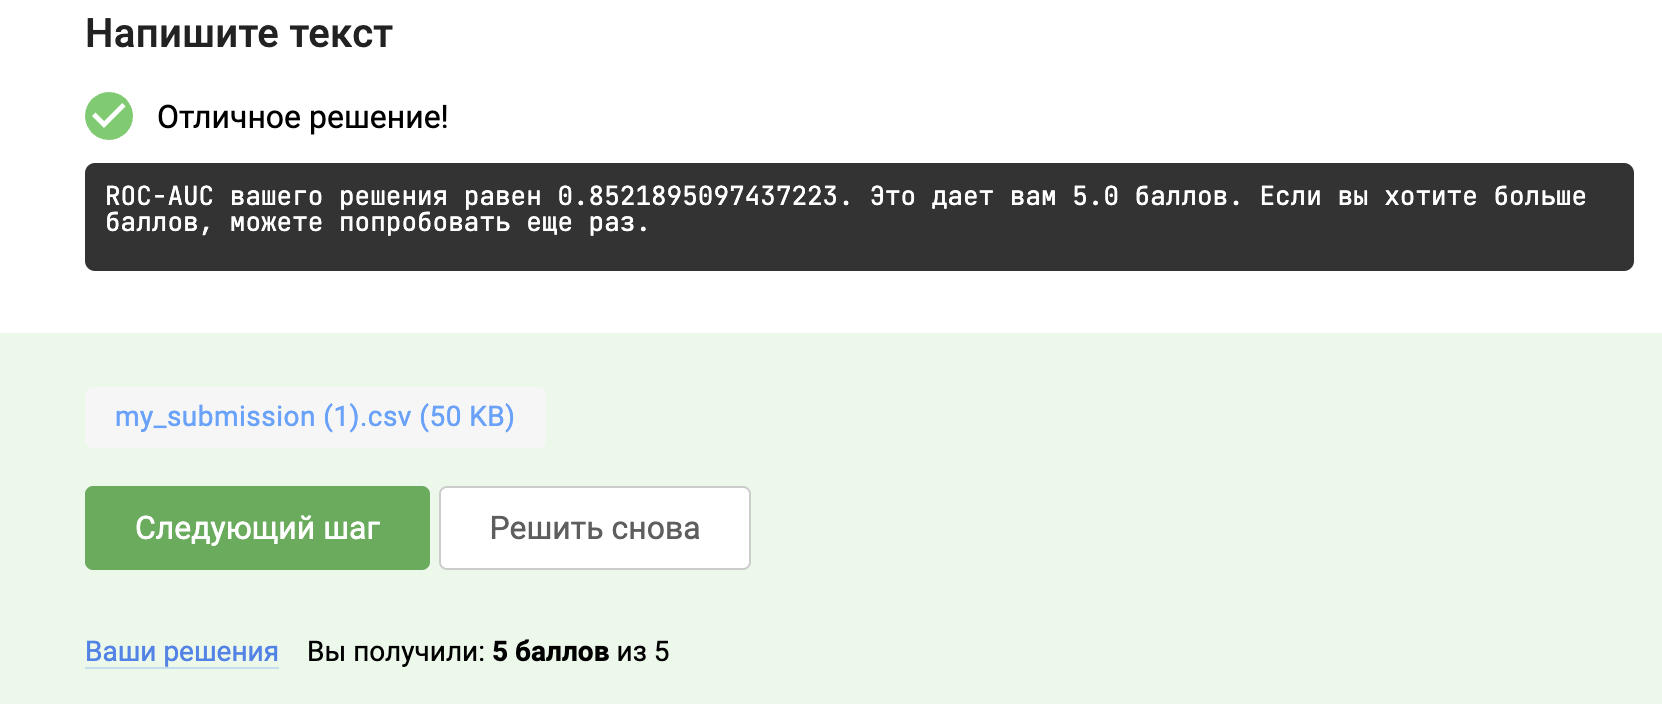